In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut, KFold,cross_val_predict,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,precision_recall_fscore_support as score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.linear_model as skl_lm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
csv1 = pd.read_csv('batch1.dat', sep='\s+', header=None, skiprows=1)
csv2 = pd.read_csv('batch2.dat', sep='\s+', header=None, skiprows=1)
csv3 = pd.read_csv('batch3.dat', sep='\s+', header=None, skiprows=1)
csv4 = pd.read_csv('batch4.dat', sep='\s+', header=None, skiprows=1)
csv5 = pd.read_csv('batch5.dat', sep='\s+', header=None, skiprows=1)
csv6 = pd.read_csv('batch6.dat', sep='\s+', header=None, skiprows=1)
csv7 = pd.read_csv('batch7.dat', sep='\s+', header=None, skiprows=1)
csv8 = pd.read_csv('batch8.dat', sep='\s+', header=None, skiprows=1)
csv9 = pd.read_csv('batch9.dat', sep='\s+', header=None, skiprows=1)
csv10 = pd.read_csv('batch10.dat', sep='\s+', header=None, skiprows=1)

In [4]:
frames = [csv7,csv8,csv9]
training = pd.concat(frames)

frames1 = [csv10]
test = pd.concat(frames1)

In [5]:
training.shape

(4374, 129)

In [6]:
test.shape

(3599, 129)

In [7]:
X_train = training.iloc[:, 1:].values 
y_train = training.iloc[:,0].values

X_test = test.iloc[:, 1:].values 
y_test = test.iloc[:,0].values

In [8]:
training.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,1,17214.4062,3.066851,8.694492,16.053404,22.050849,-3.082581,-9.347596,-19.005447,13802.6933,...,-2.536536,-6.256935,6657.4287,2.432613,5.920652,17.824644,22.486975,-1.496997,-2.282508,-5.792101
1,2,72499.9805,11.760671,19.784823,28.803632,39.038566,-12.534761,-52.269110,-119.403834,71772.2754,...,-12.693258,-27.931725,30176.7824,8.994150,12.771287,33.776899,41.388151,-6.646315,-11.199621,-23.712482
2,2,5193.0732,1.501464,2.192588,7.847533,18.126423,-0.923631,-1.808166,-8.571033,6005.3154,...,-1.209177,-4.693469,3511.7251,1.582411,1.328148,2.551579,5.309492,-0.593732,-1.014355,-4.309950
3,1,110085.7266,12.956479,32.468904,51.546460,65.828700,-23.672264,-33.643204,-107.868766,86485.9551,...,-22.378261,-40.410280,38669.7744,8.295207,14.540645,32.476122,38.675758,-10.718451,-18.636615,-29.208257
4,1,31414.6562,4.774779,11.058943,18.869583,24.748275,-6.193488,-9.142662,-23.353843,25401.3652,...,-4.563446,-8.808616,10974.5268,3.346064,6.912600,20.246224,26.655627,-2.576000,-3.956823,-7.841193


In [9]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4374 entries, 0 to 468
Columns: 129 entries, 0 to 128
dtypes: float64(128), int64(1)
memory usage: 4.3 MB


In [10]:
training.describe()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
count,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,...,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000
mean,3.545725,19289.210848,5.314245,5.024815,7.657077,13.211931,-3.477802,-5.918832,-19.822595,43670.411141,...,-7.851398,-15.759386,17522.839351,4.390470,6.571374,14.042836,18.571622,-4.144613,-6.698298,-13.607340
std,1.713157,27708.256552,7.289633,7.538698,11.574381,16.319344,5.277833,9.937690,31.755728,36826.882528,...,5.799281,10.198255,10859.294712,2.191196,4.604913,12.272107,14.798021,2.904183,4.811521,8.481345
min,1.000000,0.326500,0.088287,0.021666,0.171450,0.723593,-47.187015,-137.775304,-295.135073,3.421900,...,-28.587820,-54.365764,457.256800,1.081637,0.363894,0.663787,3.342424,-13.795061,-23.356456,-44.320639
25%,2.000000,3129.944475,1.977252,0.801521,1.426907,4.309919,-3.478280,-5.481360,-17.122871,15142.333575,...,-11.861583,-22.276668,8110.781750,2.778803,3.006246,5.027825,7.952089,-6.185685,-9.994789,-19.093148
50%,4.000000,10059.430650,2.852029,2.339049,3.475949,7.179519,-1.606927,-2.494587,-8.887104,34353.666000,...,-6.152702,-12.847731,15469.561050,3.876266,5.197088,9.485456,13.118716,-3.436326,-5.407819,-11.397067
75%,5.000000,19382.329025,4.979916,5.182984,7.740095,13.825696,-0.574797,-1.073449,-4.863154,61841.602500,...,-2.978225,-7.322274,25546.533275,5.772504,9.217972,18.374560,23.338984,-1.635124,-2.529318,-6.274502
max,6.000000,191440.293900,112.412401,54.095930,128.683269,185.315126,-0.021669,-0.211571,-1.602472,179763.500000,...,-0.567714,-3.203205,51917.206000,19.228488,27.087042,68.718160,85.385080,-0.214300,-0.540374,-2.947455


In [11]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,3,-35.6889,0.993944,0.166099,0.489363,3.484663,-0.130298,-0.528364,-3.735347,266.4145,...,-0.622342,-4.482534,904.9898,1.433707,1.068069,2.532958,5.369720,-0.183779,-0.534087,-4.635975
1,4,63927.2217,14.956941,19.971376,29.188512,33.291320,-10.433776,-16.062245,-49.490143,57405.8483,...,-7.762551,-25.150090,14585.7879,8.189021,6.099452,12.127991,15.709651,-3.887082,-6.731473,-19.326895
2,3,2992.9019,1.380553,0.808910,1.288259,4.660135,-0.755903,-1.120470,-4.075213,4301.4033,...,-3.244969,-7.215792,6044.5554,3.488295,2.662288,5.938297,8.544508,-1.567322,-2.701235,-6.472439
3,4,57524.7812,11.912566,14.631496,19.809240,23.715868,-9.084750,-11.770585,-39.234003,50051.0703,...,-5.093413,-10.248794,10580.1006,5.752675,3.880740,8.545897,11.831716,-2.655521,-4.312744,-8.510591
4,3,6277.2749,1.829743,1.248356,1.742839,4.357035,-1.203431,-1.663068,-5.747398,7778.0552,...,-4.317619,-9.747358,8620.2464,4.587509,3.597882,8.375652,12.083544,-2.024297,-3.536502,-7.403311


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599 entries, 0 to 3598
Columns: 129 entries, 0 to 128
dtypes: float64(128), int64(1)
memory usage: 3.5 MB


In [13]:
test.describe()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
count,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,...,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000,3599.000000
mean,3.499861,44536.887458,5.722079,11.385515,16.314872,28.096582,-7.567447,-13.562222,-87.236652,52582.337791,...,-9.408363,-23.252500,15539.920959,6.561365,5.852377,11.556905,16.145749,-4.429755,-8.044536,-18.943997
std,1.708279,57433.415418,4.819574,14.707524,21.711907,48.379565,9.594885,22.841194,204.113751,69519.413337,...,13.645444,40.237352,17610.555127,6.042914,6.002307,10.149264,12.067911,5.844271,11.178874,30.117358
min,1.000000,-1377.306600,0.852502,0.036450,0.269042,2.250820,-46.280557,-162.265230,-1664.735576,-2509.142600,...,-76.069200,-337.288100,-198.476500,0.936072,0.353431,0.673172,3.267195,-30.205911,-58.844076,-215.418100
25%,2.000000,6359.689950,2.093789,2.110526,3.124479,6.071997,-9.705211,-13.174559,-45.167614,11303.174300,...,-9.618488,-19.816648,5383.423850,2.828778,2.143410,4.431191,7.737242,-4.795027,-8.431047,-16.680848
50%,3.000000,24285.308300,3.944274,5.522887,7.542356,11.406871,-3.851079,-5.238129,-14.549900,30858.859400,...,-5.187354,-10.546100,10535.569900,4.689308,4.103705,8.545897,12.506405,-2.698586,-4.667171,-9.238631
75%,5.000000,52373.287350,8.196890,13.855429,19.632736,27.950001,-1.214070,-1.755285,-5.672646,48353.955450,...,-2.033419,-5.859252,17968.505900,7.939533,7.258179,15.600644,20.680768,-1.089123,-1.872206,-5.381551
max,6.000000,282551.562500,29.147021,83.680018,128.112090,664.208067,-0.048260,-0.231926,-1.780013,301411.189400,...,-0.363441,-2.736956,90968.734600,40.159623,32.203601,61.160996,79.152049,-0.070088,-0.341295,-2.176613


In [14]:
corr_matrix = test.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,1.000000,0.214509,0.194460,0.191435,0.186751,0.164199,-0.079686,-0.107158,-0.133125,0.297002,...,-0.070720,-0.103779,0.113819,0.072422,0.053798,-0.079540,-0.073676,-0.060573,-0.067283,-0.102053
1,0.214509,1.000000,0.696628,0.995097,0.988877,0.856389,-0.750820,-0.717758,-0.681306,0.965999,...,-0.699192,-0.664166,0.893814,0.806839,0.851932,0.786914,0.797128,-0.710002,-0.706577,-0.677983
2,0.194460,0.696628,1.000000,0.686780,0.660964,0.457617,-0.557703,-0.456933,-0.381785,0.696703,...,-0.485013,-0.428091,0.622629,0.647267,0.580541,0.578684,0.583230,-0.504269,-0.489941,-0.441172
3,0.191435,0.995097,0.686780,1.000000,0.997399,0.869818,-0.745488,-0.717465,-0.682229,0.957945,...,-0.704702,-0.672090,0.897604,0.807416,0.866256,0.809872,0.820534,-0.713931,-0.711593,-0.685029
4,0.186751,0.988877,0.660964,0.997399,1.000000,0.893759,-0.736440,-0.721260,-0.690592,0.948109,...,-0.703147,-0.677677,0.894895,0.797068,0.867634,0.813645,0.826421,-0.710259,-0.709901,-0.689464
5,0.164199,0.856389,0.457617,0.869818,0.893759,1.000000,-0.625809,-0.694422,-0.691177,0.793909,...,-0.609162,-0.631100,0.771263,0.653022,0.757903,0.718424,0.744940,-0.606587,-0.617225,-0.639178
6,-0.079686,-0.750820,-0.557703,-0.745488,-0.736440,-0.625809,1.000000,0.948245,0.893620,-0.709926,...,0.874098,0.832459,-0.679012,-0.652254,-0.652137,-0.612704,-0.617912,0.888259,0.884695,0.847936
7,-0.107158,-0.717758,-0.456933,-0.717465,-0.721260,-0.694422,0.948245,1.000000,0.979718,-0.677285,...,0.887393,0.901842,-0.671481,-0.645207,-0.653333,-0.611496,-0.625388,0.884800,0.893936,0.909835
8,-0.133125,-0.681306,-0.381785,-0.682229,-0.690592,-0.691177,0.893620,0.979718,1.000000,-0.651863,...,0.876602,0.906844,-0.657013,-0.635651,-0.642497,-0.591425,-0.608145,0.866441,0.880583,0.913091
9,0.297002,0.965999,0.696703,0.957945,0.948109,0.793909,-0.709926,-0.677285,-0.651863,1.000000,...,-0.722968,-0.679258,0.926182,0.861922,0.880365,0.793359,0.798903,-0.730759,-0.725626,-0.691828


In [15]:
corr_matrix = training.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,1.000000,-0.004756,-0.349672,-0.043459,-0.059028,-0.008754,0.057370,0.042256,-0.033462,0.265403,...,0.254807,0.203747,-0.189057,-0.345309,-0.431308,-0.539146,-0.532115,0.236503,0.249629,0.192013
1,-0.004756,1.000000,0.386698,0.979430,0.936272,0.936442,-0.968255,-0.854660,-0.941022,0.564590,...,-0.508931,-0.524410,0.521910,0.430346,0.371517,0.217127,0.206179,-0.507113,-0.501173,-0.521771
2,-0.349672,0.386698,1.000000,0.374523,0.349952,0.299071,-0.384620,-0.299587,-0.272897,0.358686,...,-0.539293,-0.505702,0.473531,0.456075,0.501547,0.427940,0.410883,-0.533401,-0.557197,-0.520827
3,-0.043459,0.979430,0.374523,1.000000,0.980160,0.966834,-0.977433,-0.878889,-0.941554,0.518837,...,-0.510628,-0.524640,0.513741,0.425044,0.392588,0.250321,0.239201,-0.506898,-0.502836,-0.521325
4,-0.059028,0.936272,0.349952,0.980160,1.000000,0.985116,-0.951798,-0.871278,-0.913026,0.475086,...,-0.489742,-0.502757,0.487013,0.397945,0.382056,0.251409,0.240516,-0.485247,-0.482257,-0.499284
5,-0.008754,0.936442,0.299071,0.966834,0.985116,1.000000,-0.946447,-0.872995,-0.922601,0.466770,...,-0.451764,-0.468153,0.455165,0.356536,0.333362,0.200948,0.192161,-0.447997,-0.442782,-0.463639
6,0.057370,-0.968255,-0.384620,-0.977433,-0.951798,-0.946447,1.000000,0.926853,0.947197,-0.491160,...,0.504495,0.516287,-0.502116,-0.405183,-0.380115,-0.242644,-0.231110,0.501090,0.497987,0.512686
7,0.042256,-0.854660,-0.299587,-0.878889,-0.871278,-0.872995,0.926853,1.000000,0.920180,-0.411267,...,0.428857,0.442527,-0.432297,-0.345006,-0.332150,-0.220000,-0.212023,0.426299,0.421761,0.437974
8,-0.033462,-0.941022,-0.272897,-0.941554,-0.913026,-0.922601,0.947197,0.920180,1.000000,-0.479273,...,0.426934,0.448344,-0.441793,-0.339837,-0.305758,-0.170286,-0.162758,0.424400,0.416512,0.443470
9,0.265403,0.564590,0.358686,0.518837,0.475086,0.466770,-0.491160,-0.411267,-0.479273,1.000000,...,-0.702830,-0.732426,0.745256,0.568372,0.457928,0.197185,0.183912,-0.711694,-0.700297,-0.735431


## Feature Scaling

In [109]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest with Grid Search CV

In [84]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
parameters = {'n_estimators': [50,100,200,300,500],'criterion': ['gini','entropy']}

grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_
print(f'Best Set of HyperParameters is {best_parameters}')
print(f'Accuracy of the Best Model is {best_accuracy}')   

f:\new folder (2)\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best Set of HyperParameters is {'criterion': 'entropy', 'n_estimators': 300}
Accuracy of the Best Model is 0.9433013260173754


## Random Forest with Cross Validation 

In [110]:
n_est = [50,100,200,300,500]
validation_accuracies_random_forest = []
for n in n_est:
    rf = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 0)
    rf.fit(X_train, y_train)
    x = cross_val_score(estimator = rf, X = X_train, y = y_train,cv=3).mean()*100
    validation_accuracies_random_forest.append(x)
    print(f'Accuracy for {n: >{3}} trees is {x: >{6}}')

Accuracy for  50 trees is 94.02915096535087
Accuracy for 100 trees is 94.21173612827594
Accuracy for 200 trees is 94.074562003067
Accuracy for 300 trees is 94.32598542039604
Accuracy for 500 trees is 94.25736699645883


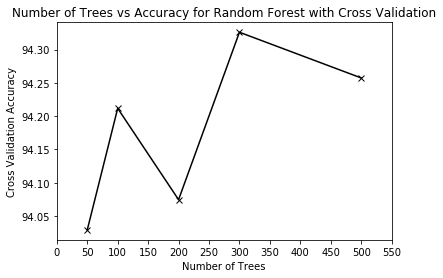

In [111]:
plt.plot(n_est,validation_accuracies_random_forest,'k-x')
plt.xlabel('Number of Trees')
plt.ylabel('Cross Validation Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest with Cross Validation')
plt.xticks(np.arange(0,600,50))
plt.show()

## Random Forest on Test Set Data

In [113]:
n_est = [50,100,200,300,500,1000]
test_set_accuracies_random_forest = []
for n in n_est:
    rf = RandomForestClassifier(n_estimators = n,criterion = 'entropy', random_state = 0)
    rf_model = rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    random_forest_accuracy = accuracy_score(y_test, y_pred_rf,normalize = False)
    random_forest_accuracy_rate = random_forest_accuracy/(len(y_test)) * 100
    test_set_accuracies_random_forest.append(random_forest_accuracy_rate)
    precision,recall,fscore,support = score(y_test , y_pred_rf,average = 'weighted')
    print(f'Number of Trees : {n: >{4}}  Precision : {np.round(precision,3):>{5}} / Recall :{np.round(recall,3):>{5}}/ Accuracy : {np.round(random_forest_accuracy_rate,3):>{5}}')

Number of Trees :   50  Precision : 0.619 / Recall :0.564/ Accuracy : 56.432
Number of Trees :  100  Precision : 0.642 / Recall : 0.58/ Accuracy : 58.044
Number of Trees :  200  Precision : 0.645 / Recall :0.586/ Accuracy : 58.572
Number of Trees :  300  Precision : 0.647 / Recall :0.586/ Accuracy : 58.627
Number of Trees :  500  Precision :  0.64 / Recall :0.583/ Accuracy : 58.266
Number of Trees : 1000  Precision : 0.647 / Recall :0.586/ Accuracy :  58.6


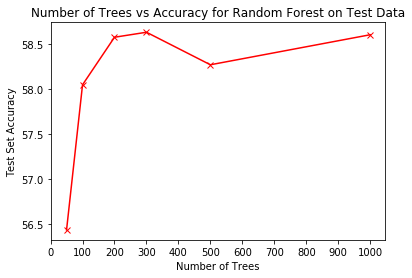

In [114]:
plt.plot(n_est,test_set_accuracies_random_forest,'r-x')
plt.xlabel('Number of Trees')
plt.ylabel('Test Set Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest on Test Data')
plt.xticks(np.arange(0,1100,100))
plt.show()

## Random Forest with PCA

In [115]:
n_components = [16,32,48,64]
for n in n_components:    
    pca = PCA(n_components = n)
    X_train_transform = pca.fit_transform(X_train)
    X_test_transform = pca.transform(X_test)
    rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
    rf.fit(X_train_transform , y_train)
    y_pred = rf.predict(X_test_transform)
    PCA_Accuracy = accuracy_score(y_test, y_pred,normalize = False)
    accuracy = PCA_Accuracy/(len(y_test))*100
    print(f'Accuracy of the Model with Principal Components {n} is {round(accuracy,3):>{5}}')

Accuracy of the Model with Principal Components 16 is 64.879
Accuracy of the Model with Principal Components 32 is 65.824
Accuracy of the Model with Principal Components 48 is 60.072
Accuracy of the Model with Principal Components 64 is 64.657


In [116]:
pca = PCA(n_components = 48)
X_train_transform_pca = pca.fit_transform(X_train)
X_test_transform_pca = pca.transform(X_test)

## Random Forest with Cross Validation and PCA

In [117]:
n_est = [50,100,200,300,500]
validation_accuracies_random_forest_pca = []
for n in n_est:
    rf_pca = RandomForestClassifier(n_estimators = n, criterion = 'entropy', random_state = 0)
    rf_pca.fit(X_train_transform_pca, y_train)
    x = cross_val_score(estimator = rf_pca, X = X_train_transform_pca, y = y_train,cv=3).mean()*100
    x = np.round(x,3)
    validation_accuracies_random_forest_pca.append(x)
    print(f'Accuracy for {n: >{3}} trees is {x:>{5}}')

Accuracy for  50 trees is 95.881
Accuracy for 100 trees is 96.315
Accuracy for 200 trees is 96.292
Accuracy for 300 trees is 96.704
Accuracy for 500 trees is 96.818


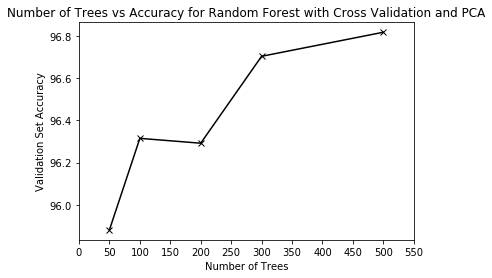

In [119]:
plt.plot(n_est,validation_accuracies_random_forest_pca,'k-x')
plt.xlabel('Number of Trees')
plt.ylabel('Validation Set Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest with Cross Validation and PCA')
plt.xticks(np.arange(0,600,50))
plt.show()

## Random Forest with PCA on Test Set Data

In [120]:
n_est = [50,100,200,300,500]
test_set_accuracies_random_forest_pca = []
for n in n_est:
    rf = RandomForestClassifier(n_estimators = n,criterion = 'entropy', random_state = 0)
    rf_model = rf.fit(X_train_transform_pca, y_train)
    y_pred = rf.predict(X_test_transform_pca)
    random_forest_accuracy_pca = accuracy_score(y_test, y_pred,normalize = False)
    random_forest_accuracy_rate_pca = random_forest_accuracy_pca/(len(y_test)) * 100
    test_set_accuracies_random_forest_pca.append(random_forest_accuracy_rate_pca)
    print(f'Accuracy of model with {n: >{3}} trees is {round(random_forest_accuracy_rate_pca,3):>{5}}') 

Accuracy of model with  50 trees is 65.129
Accuracy of model with 100 trees is 65.046
Accuracy of model with 200 trees is 64.907
Accuracy of model with 300 trees is 64.935
Accuracy of model with 500 trees is 65.213


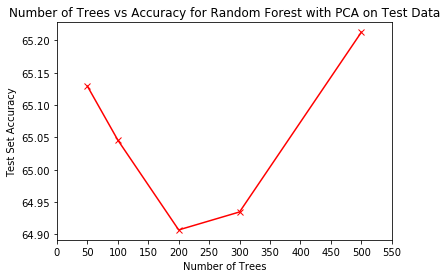

In [122]:
plt.plot(n_est,test_set_accuracies_random_forest_pca,'r-x')
plt.xlabel('Number of Trees')
plt.ylabel('Test Set Accuracy')
plt.title('Number of Trees vs Accuracy for Random Forest with PCA on Test Data')
plt.xticks(np.arange(0,600,50))
plt.show()

## SVM with Grid Search and Cross Validation

In [123]:
svc = SVC(random_state = 0)
svc.fit(X_train, y_train)
parameters = {'C': [1,10,50,100,500,1000], 'kernel': ['linear','rbf'],'decision_function_shape' : ['ovo','ovr'],
              'gamma' : ['scale','auto']}
grid_search = GridSearchCV(estimator = svc,param_grid = parameters,scoring = 'accuracy',n_jobs = -1,cv=3)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_
print(f'Best Set of HyperParameters is {best_parameters}')
print(f'Accuracy of the Best Model is {best_accuracy}')      
              

Best Set of HyperParameters is {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}
Accuracy of the Best Model is 0.965249199817101


In [124]:
C = [1,10,50,100,500,1000]
validation_accuracies_svc = []
for i in C:
    svc = SVC(C = i, kernel = 'rbf', random_state = 0, decision_function_shape = 'ovo' ,gamma = 'auto')
    svc.fit(X_train, y_train)
    x = cross_val_score(estimator = svc, X = X_train, y = y_train, cv=3).mean()*100
    validation_accuracies_svc.append(x)
    print(f'Accuracy with Penalty Parameter {i:>{4}} is {round(x,3):>{5}}') 

Accuracy with Penalty Parameter    1 is 92.335
Accuracy with Penalty Parameter   10 is 94.713
Accuracy with Penalty Parameter   50 is 96.246
Accuracy with Penalty Parameter  100 is 96.246
Accuracy with Penalty Parameter  500 is 95.172
Accuracy with Penalty Parameter 1000 is 94.898


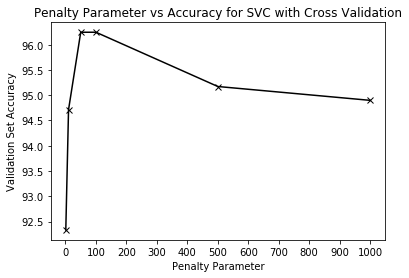

In [125]:
plt.plot(C,validation_accuracies_svc,'k-x')
plt.xlabel('Penalty Parameter')
plt.ylabel('Validation Set Accuracy')
plt.title('Penalty Parameter vs Accuracy for SVC with Cross Validation')
plt.xticks(np.arange(0,1100,100))
plt.show()

## SVC on Test Data

In [126]:
C = [1,10,50,100,500,1000]
test_set_accuracies_svc = []
for i in C:
    svc = SVC(C = i, kernel = 'rbf', random_state = 0, decision_function_shape = 'ovo' ,gamma = 'auto')
    svc.fit(X_train, y_train)
    y_pred_svc = svc.predict(X_test)
    svc_accuracy = accuracy_score(y_test, y_pred_svc,normalize = False)
    svc_accuracy_rate = svc_accuracy/(len(y_test)) * 100
    test_set_accuracies_svc.append(svc_accuracy_rate)
    precision,recall,fscore,support = score(y_test , y_pred_svc,average = 'weighted')
    print(f'Penalty Parameter C : {i: >{4}}  Precision : {np.round(precision,3):>{5}} / Recall :{np.round(recall,3):>{5}}/ Accuracy : {np.round(svc_accuracy_rate,3):>{5}}')

Penalty Parameter C :    1  Precision : 0.715 / Recall :0.655/ Accuracy : 65.518
Penalty Parameter C :   10  Precision : 0.727 / Recall : 0.66/ Accuracy : 65.991
Penalty Parameter C :   50  Precision : 0.729 / Recall :0.669/ Accuracy : 66.852
Penalty Parameter C :  100  Precision : 0.734 / Recall :0.676/ Accuracy : 67.574
Penalty Parameter C :  500  Precision : 0.631 / Recall :0.587/ Accuracy : 58.683
Penalty Parameter C : 1000  Precision : 0.623 / Recall : 0.58/ Accuracy : 58.016


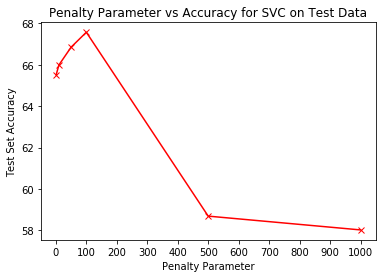

In [127]:
plt.plot(C,test_set_accuracies_svc,'r-x')
plt.xlabel('Penalty Parameter')
plt.ylabel('Test Set Accuracy')
plt.title('Penalty Parameter vs Accuracy for SVC on Test Data')
plt.xticks(np.arange(0,1100,100))
plt.show()

## Gradient Boosting with Grid Search CV

In [100]:
gb = GradientBoostingClassifier(random_state = 0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
# Parameters to Evaluate to find which set of hyperparameters work the best
param = {
    'n_estimators' : [100,500],
    'learning_rate' : [0.01,0.1]
}
gs = GridSearchCV(gb,param,cv=3,n_jobs=-1)
gs.fit(X_train,y_train)
best_accuracy = gs.best_score_ 
best_parameters = gs.best_params_
print(f'Best Set of HyperParameters is {best_parameters}')
print(f'Accuracy of the Best Model is {best_accuracy}')  


Best Set of HyperParameters is {'learning_rate': 0.1, 'n_estimators': 500}
Accuracy of the Best Model is 0.8943758573388203


In [101]:
validation_accuracies_gradient_boosting = []
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
gb.fit(X_train, y_train)
x = cross_val_score(estimator = gb, X = X_train, y = y_train,cv=3).mean()*100
validation_accuracies_gradient_boosting.append(x)
print(f'Accuracy for 500 trees is {x}')

Accuracy for 500 trees is 89.43064115607665


In [102]:
test_set_accuracies_gb = []
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb,normalize = False)
gb_accuracy_rate = gb_accuracy/(len(y_test)) * 100
test_set_accuracies_gb.append(gb_accuracy_rate)
precision,recall,fscore,support = score(y_test,y_pred_gb,average = 'weighted')
print('n_estimators : {} ------- / --- Precision : {} / Recall :{}/ Accuracy : {}'
        .format(500,np.round(precision,3),np.round(recall,3),np.round(gb_accuracy_rate,3)))

n_estimators : 500 ------- / --- Precision : 0.598 / Recall :0.549/ Accuracy : 54.932
